# Demonstration notebook for the Pulse of the City project.

In this notebook, you will find examples of how to run the scripts and obtain results from the pedestrian traffic prediction, as well as the spatial interpolation and visualisation systems.

** Index: **
1. [Part 1: Predicting pedestrian traffic](#Part-1:-Predicting-pedestrian-traffic)
2. [Part 2: Spatial interpolation and visualisation](#Part-2:-Spatial-interpolation-and-visualisation)

---
# Part 1: Predicting pedestrian traffic
An example of getting predictions from the prediction module and making use of them.

Import and initialise the predictor object.

In [1]:
# Import the predictor class into your workspace
import Predictor
# Initialise the predictor object
predictor = Predictor.Predictor()

Generate predictions for a certain timeframe
- Make sure the date-time string is in `yyyy-mm-ddTHH:MM:SS` format.
- First and second parameters define the start and the end of the requested time frame (start included, end excluded from the interval).

In [2]:
# Generate the predictions for a specific time frame
predictions = predictor.predict_timeframe("2020-01-11T12:00:00", "2020-01-11T14:00:00")

Generating predictions...
[----------------------------------------------------------------------------------------------------] Done!


In [3]:
print(predictions)

              Datetime  Plein 1944 primark:West_low  \
0  2020-01-11 12:00:00                          601   
0  2020-01-11 13:00:00                          533   

   Plein 1944 primark:West_mid  Plein 1944 primark:West_high  \
0                         1123                          1646   
0                         1033                          1532   

   Hezelstraat:Hezelstraat_low  Hezelstraat:Hezelstraat_mid  \
0                          982                         1285   
0                          997                         1337   

   Hezelstraat:Hezelstraat_high  Kruidvat Burchtstraat:East_low  \
0                          1588                              81   
0                          1677                             182   

   Kruidvat Burchtstraat:East_mid  Kruidvat Burchtstraat:East_high  \
0                             336                              591   
0                             389                              597   

                   ...                

##### NOTE: these predictions are stored as a pandas dataframe, 
So, you can use all of the included functionality with it, such as saving it to a `.csv` file with `predictions.to_csv("<filename>.csv")`

---
As you can see, not passing the optional `request_ids` parameter results in predictions for all modelled locations.

If you only want to generate predictions for a certain location, you can do the following:

In [4]:
# Print the list of modelled locations with their IDs
Predictor.dump_names()

0                               Plein 1944 primark:West
1                               Hezelstraat:Hezelstraat
2                            Kruidvat Burchtstraat:East
3                  Molenpoort Ziekerstraat:Koningsplein
4                    Busstation bij bord bustijden:Area
5         Busstation op hoek richting perrons:Commuters
6     Burgemeester Hustinxstraat:Burgemeester Hustin...
7     Busstation oversteek stationsplein-Burgemeeste...
8                       Stationsplein:Keizer Karelplein
9           Stationsplein gele oversteekplaats:Crossing
10                          Smetiusstraat:Smetiusstraat
11                          Kop Molenstraat:Molenstraat
12           Coef Van Welderenstraat:Van Welderenstraat
13                   Molenpoort Molenstraat:Molenstraat
14           Plein 1944 fietsenkelder:Pedestrians-South
15                     Prikkels Houtstraat:Ganzenheuvel
16                      Ziekerstraat Coeff:Ziekerstraat
17                     Koningsplein Dedicated:Pl

In [5]:
# Find the ID(s) of location(s) you wish to predict for and include a list of them for the `request_ids` parameter.
ids = [0, 11, 17]
predictions_specific = predictor.predict_timeframe("2020-01-11T12:00:00", "2020-01-11T14:00:00", ids)
# NOTE: even if you are predicting for one location, you will need to pass it as an array (e.g. [5]).

Generating predictions...
[----------------------------------------------------------------------------------------------------] Done!


In [6]:
print(predictions_specific)

              Datetime  Plein 1944 primark:West_low  \
0  2020-01-11 12:00:00                          601   
0  2020-01-11 13:00:00                          533   

   Plein 1944 primark:West_mid  Plein 1944 primark:West_high  \
0                         1123                          1646   
0                         1033                          1532   

   Kop Molenstraat:Molenstraat_low  Kop Molenstraat:Molenstraat_mid  \
0                             1330                             1703   
0                             1260                             1654   

   Kop Molenstraat:Molenstraat_high  Koningsplein Dedicated:Plein1944_low  \
0                              2077                                  1287   
0                              2047                                  1484   

   Koningsplein Dedicated:Plein1944_mid  Koningsplein Dedicated:Plein1944_high  
0                                  1550                                   1814  
0                                

---
As you may have noticed, the prediction dataframe contains 3 columns for each location: `low`, `mid` and `high`. These colums represent the prediction **together with the limits of the confidence interval**:

- `low` is the lower bound of the confidence interval,
- `mid` is the prediction itself,
- `high` is the higher bound of the confidence interval.

If you do not need the confidence interval for your purpose, you can also pass an optional parameter `ci` as `False`:

In [7]:
predictions_no_ci = predictor.predict_timeframe("2020-01-11T12:00:00", "2020-01-11T14:00:00", [8, 11], ci=False)

Generating predictions...
[----------------------------------------------------------------------------------------------------] Done!


In [8]:
print(predictions_no_ci)

              Datetime  Stationsplein:Keizer Karelplein  \
0  2020-01-11 12:00:00                              233   
0  2020-01-11 13:00:00                              218   

   Kop Molenstraat:Molenstraat  
0                         1703  
0                         1654  



---

To access the predicted values directly, convert the dataframe into an array, by doing the following:

In [9]:
pred_values = predictions_no_ci.values[:, 1:] # the '[:, 1:]' picks all rows with all but the 1st (date-time) column.

Then you can use standard python indexing to access any element(s) in the array:

In [10]:
print(pred_values[0, 1]) # First row, second column
print(pred_values[0])    # First row, all columns   
print(pred_values[:, 1]) # All rows, second column

1703
[233 1703]
[1703 1654]


**If you are using the confidence interval**, to parse the predictions, do the following:

In [11]:
# (setting up a new prediction dataframe for demonstration)
predictions = predictor.predict_timeframe("2020-01-11T09:00:00", "2020-01-11T21:00:00", [0, 11])
print(predictions)

Generating predictions...
[----------------------------------------------------------------------------------------------------] Done!
              Datetime  Plein 1944 primark:West_low  \
0  2020-01-11 09:00:00                          549   
0  2020-01-11 10:00:00                          761   
0  2020-01-11 11:00:00                          739   
0  2020-01-11 12:00:00                          601   
0  2020-01-11 13:00:00                          533   
0  2020-01-11 14:00:00                          632   
0  2020-01-11 15:00:00                          704   
0  2020-01-11 16:00:00                          472   
0  2020-01-11 17:00:00                          272   
0  2020-01-11 18:00:00                          189   
0  2020-01-11 19:00:00                           90   
0  2020-01-11 20:00:00                           75   

   Plein 1944 primark:West_mid  Plein 1944 primark:West_high  \
0                          897                          1244   
0                    

In [12]:
# Get the IDs of columns that contain the different components of the predictions:
dataframe_ids = Predictor.get_prediction_ids(predictions)

# This matrix contains indices for each type of prediction (low, mid, high).

# First row is lower bound IDs:
low_ids = dataframe_ids[0]

# Second row is the actual prediction IDs:
pred_ids = dataframe_ids[1]

# Third row is the upper bound IDs:
high_ids = dataframe_ids[2]

# Now, to get the actual values, just convert the dataframe into an array:
dataframe_values = predictions.values
# Here, we do not remove the date-time column, as that will be taken care of by the IDs.

# And now you can access whichever values you wish:
# To get only the actual predictions:
prediction_values = dataframe_values[:, pred_ids] # NOTE: 1st index is the time index, ':' takes all rows.
print("Predictions: \n" + str(prediction_values))

# Works the same way with lower or upper bounds:
high_values = dataframe_values[:, high_ids]
low_values = dataframe_values[:, low_ids]
print("Highs: \n" + str(high_values))
print("Lows: \n" + str(low_values))

Predictions: 
[[897 839]
 [1181 1159]
 [1202 1477]
 [1123 1703]
 [1033 1654]
 [1092 1543]
 [1107 1357]
 [836 1038]
 [503 769]
 [348 624]
 [304 476]
 [248 338]]
Highs: 
[[1244 1178]
 [1601 1480]
 [1665 1834]
 [1646 2077]
 [1532 2047]
 [1553 1989]
 [1510 1795]
 [1199 1442]
 [733 1110]
 [507 907]
 [518 691]
 [421 493]]
Lows: 
[[549 500]
 [761 838]
 [739 1120]
 [601 1330]
 [533 1260]
 [632 1097]
 [704 919]
 [472 634]
 [272 428]
 [189 340]
 [90 262]
 [75 182]]


## Now you can use these values for anything you like!

### Example: plotting the curve

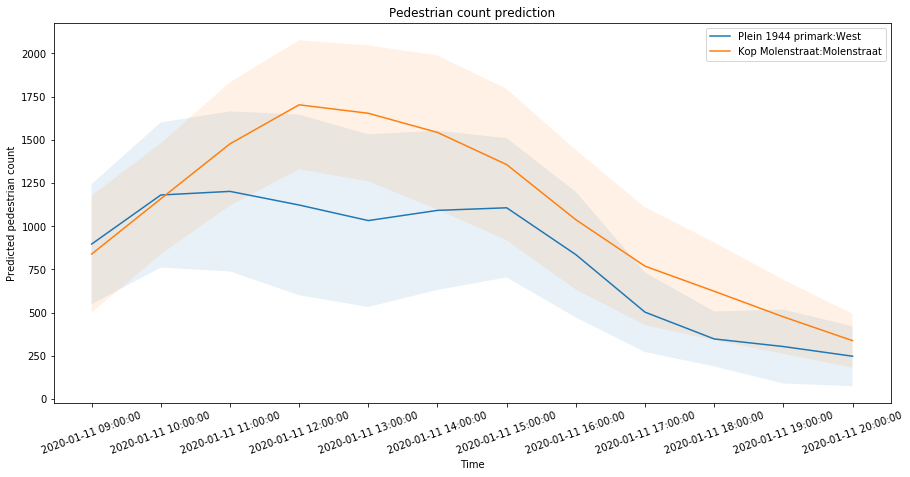

In [14]:
# import the plotting library
from matplotlib import pyplot as plt

# Create a new figure
plt.figure(figsize = (15, 7))
plt.title("Pedestrian count prediction")

# Plot the prediction curves:
# 1st column in the prediction values stores predictions for location 0 - Plein 1944 primark:West
plt.plot(prediction_values[:, 0], label = "Plein 1944 primark:West")
# 2nd column is for location 11 - Kop Molenstraat:Molenstraat
plt.plot(prediction_values[:, 1], label = "Kop Molenstraat:Molenstraat")

# Add the confidence interval as a coloured area between lows and highs:
# For Plein 1944 primark:West:
plt.fill_between(
    range(12),                # X axis indices for the area - in this case, we fill the whole range of 12 predictions
    list(low_values[:, 0]),   # Lower bound of the area to fill
    list(high_values[:, 0]),  # Higher bound of the area to fill
    alpha = 0.1               # Making the area transparent.
)
# For Kop Molenstraat:Molenstraat:
plt.fill_between(
    range(12),
    list(low_values[:, 1]),
    list(high_values[:, 1]),
    alpha = 0.1
)

# You can use the date-time column values as x tick labels
plt.xticks(range(12), predictions.values[:, 0], rotation=20)

# Set the name of axes
plt.xlabel("Time")
plt.ylabel("Predicted pedestrian count")

# Add a legend
plt.legend()

# Show the figure
plt.show()

---
# Part 2: Spatial interpolation and visualisation

An example of using the spatial interpolation module of the project.

Import and initialise the interpolator object

In [15]:
# Import the interpolator class into your workspace
import Interpolator

# Initialise the interpolator object.
# The parameter of the initialisation determines the resolution scale of the interpolation
# 1.0 - 100% - 1600x950
# 0.5 - 50%  - 800x475, etc.
interpolator = Interpolator.Interpolator(1.0)

Now, you can either:
1. Interpolate a prediction for a certain date and hour:

In [16]:
# The resulting image is saved in Images/Interpolation.png by default
# if you would like to change the name of the resulting image, pass an optional parameter 'filename' with the chosen name:
interpolator.interpolate_predict("2020-01-15T13:00:00", filename="Demo1")

Generating predictions...
[----------------------------------------------------------------------------------------------------] Done!
Building the interpolated map...
[----------------------------------------------------------------------------------------------------] Done!


Or
2. Interpolate your own array of data from the 42 locations (e.g. actual observations, pulled from the Numina API).

In [17]:
# For demonstration purposes, array of 42 random values will be interpolated:

# Generate 42 random values with numpy's random library
import numpy as np
values = np.random.uniform(0, 2500, 42)

# Interpolate these values and visualise them on the map:
interpolator.interpolate_data(values, filename="Demo2")

Building the interpolated map...
[----------------------------------------------------------------------------------------------------] Done!


## Thank you for using my project and good luck!

**Made by:** *Domantas Giržadas, 2020*